# Overview

Watch this video:
[Hidden Figures](https://www.youtube.com/watch?v=v-pbGAts_Fg)

The method that they used to calculate the trajectory of the space shuttle is called Euler's Method.  In this numerical problem you will learn what Euler's Method is and how to use it to solve some one-dimensional problems involving air drag.
    
    
## Euler's Method

Euler’s method is a numerical approach for finding velocities and positions when the acceleration is **not** constant. In this approach, very small time steps are made into the future and new positions and velocities are calculated using the simple formulas:

$$ v_f = v_i + a \Delta t$$
$$ x_f = x_i + v \Delta t$$

(the $ {1\over 2} a \Delta t^2$ term is not needed because the velocity is assumed to be constant over such a small time interval.)

Your choice for $\Delta t$ is critical to the accuracy of the method. Smaller time steps produce more accurate results (to a point) at greater computational cost.  

## Example

Let's see how to code Euler's method for a simple problem.  In this problem, a steel ball is thrown upward with an initial velocity $v_i = 10$ m/s from a height of $4$ m.  We'd like to know when it lands on the ground and how fast it's going.

It took 2.38 seconds for the particle to hit the ground
The velocity of the particle as it hit the ground was -13.35 meters/seconds


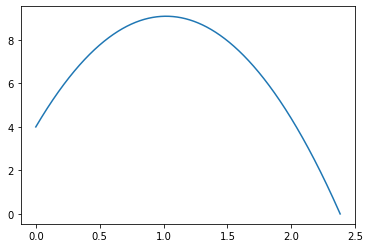

In [11]:


vi = 10
a = -9.8
deltat = 0.1

y = [4]
v = [10]
t = [0]

while y[-1] > 0:
    v.append(v[-1] + a * deltat)
    y.append(y[-1] + v[-1] * deltat)
    t.append(t[-1] + deltat)
    
from matplotlib import pyplot

print("It took{:5.2f} seconds for the particle to hit the ground".format(t[-1]))
print("The velocity of the particle as it hit the ground was {:5.2f} meters/seconds".format(v[-1]))

pyplot.plot(t,y)
pyplot.show()

Do the following:

1. Play with the time step; make it big, make it small. Draw conclusions.
2. Change the initial conditions and verify that the results make sense to you.
3. Comment the code above. If you don't understand what a line does, ask me or a classmate.


## Your Problem


A hailstone of mass $4.8 \times 10^{-4} $kg is dropped from an initial height of $50$ m and falls through the air ,experiencing a net force (gravity plus drag) given by:

$$ F = - m g + C v^2$$

where $C = 2.5\times 10^{-5} kg/m$.

1. Calculate the terminal speed of the hailstone.  ($v_t = \sqrt{m g \over C}$)
2. Modify the code from above to find the speed and position of the hailstone as a function of time.  
3. Plot the position of the hailstone as a function of time.  How do you know that terminal velocity has been reached?
4. Plot the velocity of the hailstone as a function of time.  Does this function agree with the position vs. time function?(slope of position = value of velocity)  Did you reach the same terminal velocity that you calculated earlier?

In [2]:
from numpy import sqrt

In [3]:
#known constants
C = 2.5e-5 #kg/m
m = 4.8e-4 #kg
h0 = 50 #m
g = 9.8 #m/s^2

### Calculate $v_t$
Calculate the terminal Speed of the Hailstone. 
$$v_t = \sqrt{\frac{mg}{C}}$$

In [6]:
vt = sqrt(m*g/C)

print(f'The terminal velocity of the hailstone is {vt:.2} m/s. ')

The terminal velocity of the hailstone is 1.4e+01 m/s. 


### Find $y(t)$ and $v(t)$

We are using Euler's Method to find the function $y(t)$.

The acceration of the hailstone is described as:
$$a = -g + \frac{Cv^2}{m}$$

In [15]:
#initial conditions
v = [0]
y = [h0]
t = [0]

dt = 0.001

while y[-1] > 0:
    #velocity function uses acceleration defined above
    v.append(v[-1] + (-g + C*v[-1]**2/m) * dt) #use last velocity in acceleration function

    #update position using new velocity
    y.append(y[-1] + v[-1] * dt)

    #add time increment
    t.append(t[-1] + dt)

print(f"It took {t[-1]:.2} seconds for the particle to hit the ground")
print(f"The velocity of the particle as it hit the ground was {v[-1]:.2} meters/seconds")


It took 4.6 seconds for the particle to hit the ground
The velocity of the particle as it hit the ground was -1.4e+01 meters/seconds


### Graphing $y(t)$ and $v(t)$


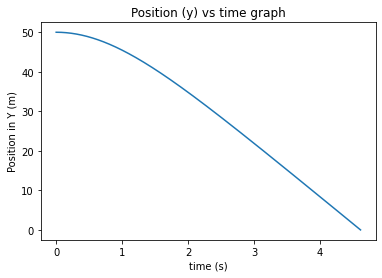

In [16]:
from matplotlib import pyplot as plt

#Position Graph
plt.plot(t,y)
plt.title('Position (y) vs time graph')
plt.xlabel('time (s)')
plt.ylabel('Position in Y (m)')
plt.show()


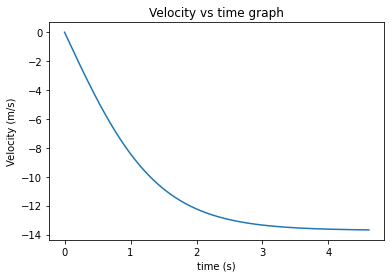

In [17]:
#Velocity Graph
plt.plot(t,v)
plt.title('Velocity vs time graph')
plt.xlabel('time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()

We can see that in the position graph, as time goes on, the slope of the graph gets more constant.

If we look at the Velocity graph, we see that the velocity approaches terminal velocity (-14 m/s) as time goes on. This makes sense because the slope of the position graph is the velocity graph, and as the slope becomes more constant, the velocity becomes more constant, and the graph becomes more flat. 